### HW 1-1 (lr=0.001)

- MNIST data, 10 class classification
- output layer를 제외하고 모든 hidden layer의 activation function을 relu로 통일
- loss: categorical_crossentropy 사용
- hidden layer: 총 9층, 각 layer는 256개 neuron
- train data는 60,000개의 example => train data 55,000개, validation data 5,000개
- 미니배치 64개
- epoch수 15
- learning rate 0.001
- train loss와 val loss 함께 볼 수 있는 그래프(learning curve) 그리기
- train accuracy와 val accuracy를 함께 볼 수 있는 그래프 (learning curve) 그리기
- 최종 performance 출력

#### 1. importing data

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### 2. building network

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

#### 3. setting optimizers

In [10]:
from keras import optimizers

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### 4. preparing image data

In [11]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

#### 5. preparing label

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### 6. validation

In [13]:
x_val = train_images[55000:]
partial_x_train = train_images[:55000]

y_val = train_labels[55000:]
partial_y_train = train_labels[:55000]

#### 7. model (network) training

In [14]:
history = network.fit(partial_x_train,
                   partial_y_train,
                   epochs=15,
                   batch_size=64,
                   validation_data=(x_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 15s 279us/step - loss: 0.0687 - accuracy: 0.9777 - val_loss: 0.0612 - val_accuracy: 0.9809
Epoch 2/15
55000/55000 [==============================] - 15s 270us/step - loss: 0.0290 - accuracy: 0.9922 - val_loss: 0.0302 - val_accuracy: 0.9922
Epoch 3/15
55000/55000 [==============================] - 19s 347us/step - loss: 0.0237 - accuracy: 0.9939 - val_loss: 0.0211 - val_accuracy: 0.9950
Epoch 4/15
55000/55000 [==============================] - 16s 299us/step - loss: 0.0222 - accuracy: 0.9947 - val_loss: 0.0190 - val_accuracy: 0.9952
Epoch 5/15
55000/55000 [==============================] - 19s 338us/step - loss: 0.0218 - accuracy: 0.9950 - val_loss: 0.0313 - val_accuracy: 0.9926
Epoch 6/15
55000/55000 [==============================] - 15s 273us/step - loss: 0.0229 - accuracy: 0.9953 - val_loss: 0.0479 - val_accuracy: 0.9926
Epoch 7/15
55000/55000 [==============================] -

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

#### 8. plotting training and validation loss

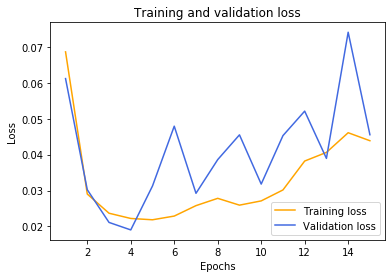

In [16]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'royalblue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

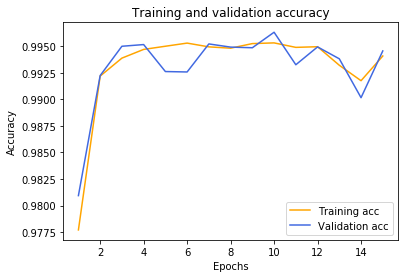

In [17]:
plt.clf() # clear figure

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'royalblue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 9. results

In [18]:
results = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 113us/step


In [19]:
results

[0.057002224645201896, 0.9932395219802856]